In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde

In [38]:
lc_df = pd.read_csv('./data/lung_cancer_prediction_dataset.csv')
ap_df = pd.read_csv('./data/global_air_pollution_dataset.csv')

In [39]:
lc_df['Annual_Lung_Cancer_Deaths_log'] = lc_df['Annual_Lung_Cancer_Deaths'].apply(lambda x: np.log(x) if x> 0 else None)
ap_df['PM2.5_AQI_Value_log'] = ap_df['PM2.5_AQI_Value'].apply(lambda x: np.log(x) if x > 0 else None)

## Part 3: Use the datasets provided to create graphs

### 1. Create a Boxplot of Lung Cancer Deaths Distribution.

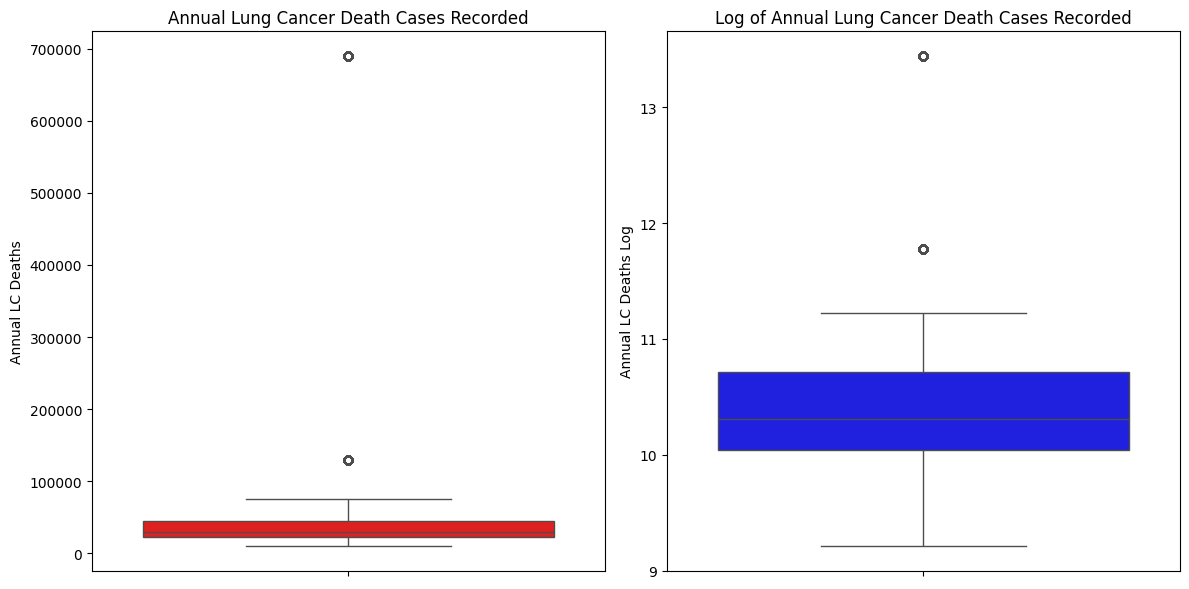

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=lc_df, y='Annual_Lung_Cancer_Deaths', color='red', ax=axes[0])
axes[0].set_ylabel('Annual LC Deaths')
axes[0].set_title('Annual Lung Cancer Death Cases Recorded')

# For better visualization (Log-transformed data)
sns.boxplot(data=lc_df, y='Annual_Lung_Cancer_Deaths_log', color='blue', ax=axes[1])
axes[1].set_ylabel('Annual LC Deaths Log')
axes[1].set_title('Log of Annual Lung Cancer Death Cases Recorded')

plt.tight_layout()
plt.show()

### 2. Create a Histogram of PM2.5 AQI Values. 

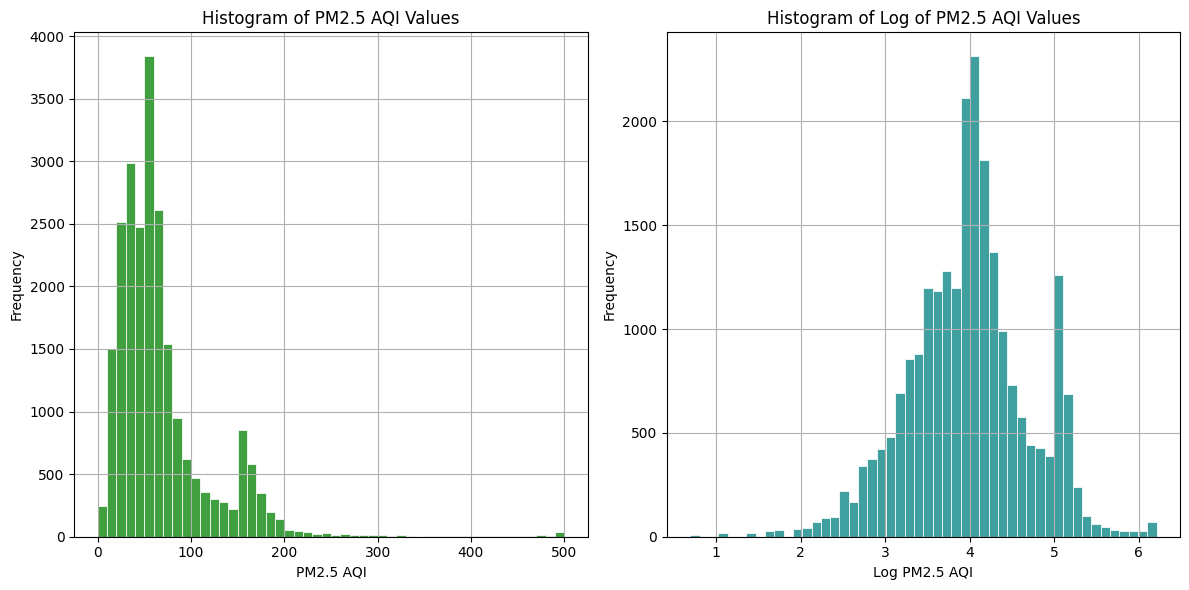

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=ap_df, x='PM2.5_AQI_Value', bins=50, color='green', edgecolor='white', ax=axes[0])
axes[0].set_title('Histogram of PM2.5 AQI Values')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('PM2.5 AQI')
axes[0].grid(True)

# For better visualization (Log-transformed data)
sns.histplot(data=ap_df, x='PM2.5_AQI_Value_log', bins=50, color='teal', edgecolor='white', ax=axes[1])
axes[1].set_title('Histogram of Log of PM2.5 AQI Values')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Log PM2.5 AQI')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3. Create a Density Plot of the Lung Cancer Mortality Rate. 

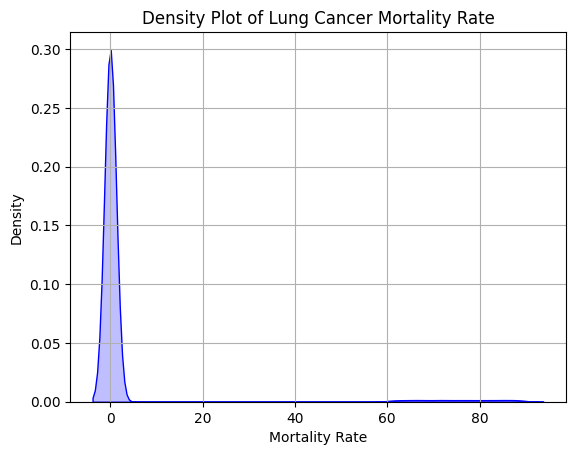

In [47]:
ax = sns.kdeplot(data=lc_df, x='Mortality_Rate', color='blue', fill=True)

plt.title('Density Plot of Lung Cancer Mortality Rate')
plt.xlabel('Mortality Rate')
plt.ylabel('Density')

plt.grid(True)

plt.show()

## Part 4: Recreate the following graphs 

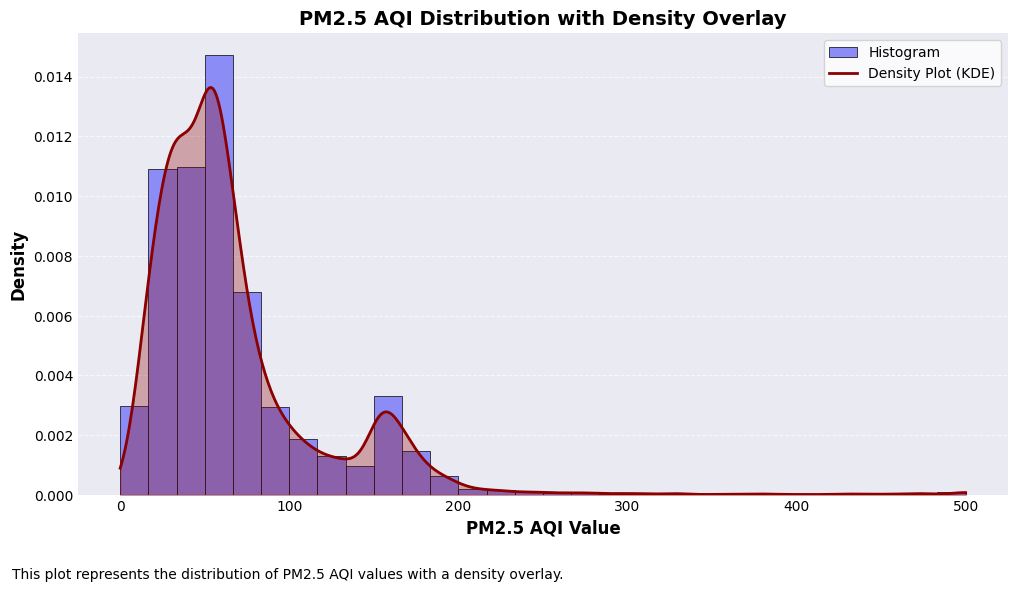

In [ ]:
# Creating the plot & setting up the theme
fig, ax = plt.subplots(figsize=(12, 6))

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.tick_params(axis='both', length=0)

ax.set_facecolor( "#EAEAF2")
ax.yaxis.grid(True, linestyle='dashed', color='white', alpha=0.7)

ax.set_axisbelow(True) # move grid lines to the background

# Creating the graphs
ax.hist(ap_df['PM2.5_AQI_Value'], bins=30, color='#8C8CF7', edgecolor='black', linewidth=0.5, density=True, label='Histogram')

kde = gaussian_kde(ap_df['PM2.5_AQI_Value'])
x_vals = np.linspace(ap_df['PM2.5_AQI_Value'].min(), ap_df['PM2.5_AQI_Value'].max(), 550)

ax.plot(x_vals, kde(x_vals), color='darkred', linewidth=2, label='Density Plot (KDE)')
ax.fill_between(x_vals, kde(x_vals), color='darkred', alpha=0.3)

# Adding the titles & labels
ax.set_title('PM2.5 AQI Distribution with Density Overlay', fontsize=14, fontweight='bold')
ax.set_xlabel('PM2.5 AQI Value', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.legend()

# Adding the annotation
plt.figtext(0.3, -0.03, 'This plot represents the distribution of PM2.5 AQI values with a density overlay.',
            wrap=True, horizontalalignment='center', fontsize=10, color='black')

plt.show()